<a href="https://colab.research.google.com/github/PabloPoche/api_service_python/blob/master/1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [8]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [10]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()


# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [11]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

df_target_categorical['species'] = df_target.apply(lambda x: 'setosa' if x['species'] == 0 else 'versicolor' if x['species'] == 1 else 'virginica', axis=1)

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda...... 

In [12]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [13]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
df_target_categorical['species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [14]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"
df_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
# print(....)
print('Cantidad de filas/datos a analizar:', df.shape[0])

Cantidad de filas/datos a analizar: 150


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [36]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris
# df_setosa = ...
df_setosa = df[df['species'] == 'setosa']

# df_versicolor = ...
df_versicolor = df[df['species'] == 'versicolor']

# df_verginica = ...
df_virginica = df[df['species'] == 'virginica']


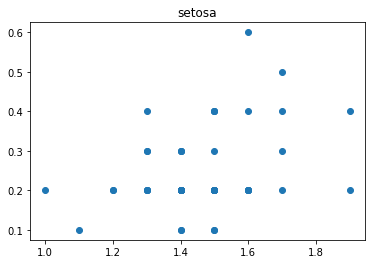

In [34]:
# Almuno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length (cm)" (x) y "petal width (cm)" (y) de la especie setosa
def plot_dataframe(df):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.scatter(df['petal length (cm)'], df['petal width (cm)'])
  df = df.reset_index()
  ax.set_title(df.loc[0, 'species'])
   
plot_dataframe(df_setosa)

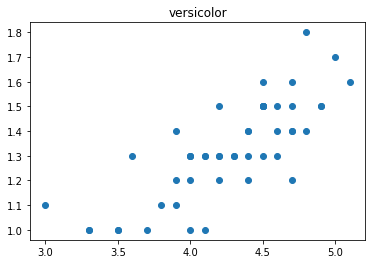

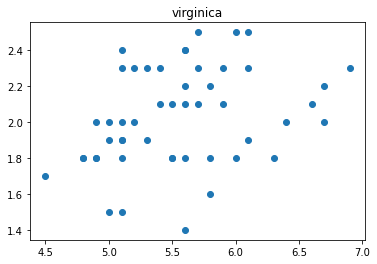

In [35]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie
plot_dataframe(df_versicolor)
plot_dataframe(df_virginica)